In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['Year.csv', 'State.csv', 'Predict_Model.csv', 'Race.csv', 'Spatial.csv']


In [2]:
import bq_helper
from bq_helper import BigQueryHelper
sampleTables = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="samples")

In [3]:
bq_assistant = BigQueryHelper("bigquery-public-data", "samples")
bq_assistant.list_tables()

['github_nested',
 'github_timeline',
 'gsod',
 'model',
 'natality',
 'shakespeare',
 'trigrams',
 'wikipedia']

In [4]:
bq_assistant.head("natality", num_rows=200)

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,apgar_1min,apgar_5min,mother_residence_state,mother_race,mother_age,gestation_weeks,lmp,mother_married,mother_birth_state,cigarette_use,cigarettes_per_day,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,2005,2005,7,NaN,3.0,None,False,NaN,8.628893,1.0,NaN,9.0,None,78.0,34,41.0,09262004,True,None,False,NaN,False,NaN,57.0,9.0,0.0,0.0,10,78.0,38,1
1,2005,2005,4,NaN,6.0,None,True,NaN,2.678616,1.0,NaN,6.0,None,78.0,36,34.0,09012004,True,None,False,NaN,False,NaN,23.0,7.0,0.0,0.0,8,78.0,39,1
2,2006,2006,5,NaN,1.0,None,True,NaN,11.062796,1.0,NaN,9.0,None,68.0,38,41.0,08082005,True,None,False,NaN,False,NaN,11.0,NaN,NaN,NaN,8,68.0,41,1
3,2007,2007,3,NaN,2.0,None,False,NaN,5.436599,2.0,NaN,9.0,None,78.0,42,38.0,99999999,True,None,False,NaN,False,NaN,10.0,NaN,NaN,NaN,8,78.0,42,1
4,2007,2007,4,NaN,7.0,None,False,NaN,3.560466,1.0,NaN,8.0,None,78.0,38,31.0,09022006,True,None,False,NaN,False,NaN,18.0,NaN,NaN,NaN,8,78.0,43,1
5,2007,2007,4,NaN,1.0,None,True,NaN,5.998778,1.0,NaN,9.0,None,78.0,37,39.0,07072006,True,None,False,NaN,False,NaN,20.0,NaN,NaN,NaN,8,78.0,42,1
6,2008,2008,1,NaN,4.0,None,True,NaN,9.186662,1.0,NaN,8.0,None,78.0,28,38.0,04072007,False,None,True,5.0,True,NaN,37.0,NaN,NaN,NaN,8,78.0,36,1
7,1998,1998,1,NaN,7.0,AK,False,9.0,4.874421,1.0,99.0,9.0,AK,3.0,26,36.0,05021997,True,AK,None,NaN,True,99.0,17.0,5.0,2.0,1.0,8,7.0,27,1
8,2003,2003,12,NaN,6.0,AR,False,NaN,8.000575,1.0,NaN,9.0,AR,78.0,36,40.0,99999999,True,YY,False,NaN,False,NaN,13.0,10.0,0.0,0.0,11,78.0,39,1
9,1969,1969,6,23.0,NaN,CA,True,7.0,7.438397,NaN,NaN,NaN,CA,7.0,45,38.0,09301998,None,,None,NaN,None,NaN,NaN,8.0,1.0,2.0,12,7.0,47,2


In [5]:
bq_assistant.table_schema("natality")

,name,type,mode,description
0,source_year,INTEGER,REQUIRED,Four-digit year of the birth. Example: 1975.
1,year,INTEGER,NULLABLE,Four-digit year of the birth. Example: 1975.
2,month,INTEGER,NULLABLE,"Month index of the date of birth, where 1=Janu..."
3,day,INTEGER,NULLABLE,"Day of birth, starting from 1."
4,wday,INTEGER,NULLABLE,"Day of the week, where 1 is Sunday and 7 is Sa..."
5,state,STRING,NULLABLE,The two character postal code for the state. E...
6,is_male,BOOLEAN,REQUIRED,"TRUE if the child is male, FALSE if female."
7,child_race,INTEGER,NULLABLE,The race of the child. One of the following nu...
8,weight_pounds,FLOAT,NULLABLE,"Weight of the child, in pounds."
9,plurality,INTEGER,NULLABLE,How many children were born as a result of thi...


**Task 1. Visualize how average APGAR @ 5 min has varied over time (from earliest year data is available to most recent)**

******-To figure this out I had orginally made a query seeking the same information listed below in query 1 except with a limit of a 100 to reduce the constraint of memory usage. For some reason I kept returning a "Bad Request " pictured below. I was puzzled as to why this was happening so I decided to utlize Google BigQuery to query through the "natality" table. I will write SQL code to answer each of the questions below using Google Biq Query and then upload the result as a "csv" file that will be visible. Additionally I will write out the queries I utilized on Google Cloud, such as the one below, to search and answer the questions from the "natality" table.

In [6]:
query1 = """SELECT year, AVG(apgar_5min) 
        FROM [bigquery-public-data:samples.natality] 
        WHERE apgar_5min<=10 and apgar_5min>=0 
        GROUP BY year 
        ORDER BY year ASC 
        LIMIT 2000000000
        """
####bq_assistant.estimate_query_size(query1)
####^Left this code in to illustrate the error that I was receiving even thought the SQL query above had no issues with regard to Google BigQuery

To explain the query I wrote to determine how the average APGAR@5min varied over time I first need to define  what APGAR is. APGAR is a quick test performed on a baby at 5 minutes after birth. The 5-minute score tells the health care provider how well the baby is doing outside the mother's womb. The APGAR score is between 0-10, 10 indicating an extremely healthy baby and 0 indicating a baby in critical need of attention. After analyzing and going through the natality dataset with regard to APGAR@5min, I noticed many values of "Null"  and addtionally odd values such as a APGAR@5min score of 99 which is not applicable. Within my query I decided to select the year from 2,000,000 data points (Google BigQuery allowed me to do this so I decided to extrapolate from more data) and the average APGAR@5min score for each year to determine the trend as the years progressed.  Below is the table queried via Google Big Query containing the results of the average APGAR@5min score for each of the relevant years. 

In [7]:
APGAR_5min_years = pd.read_csv('../input/Year.csv')
APGAR_5min_years                           

,year,f0_
0,1971,10.000000
1,1978,9.174042
2,1979,9.162667
3,1980,9.123253
4,1981,9.087613
5,1982,9.057134
6,1983,9.031897
7,1984,9.014219
8,1985,9.001441
9,1986,8.993066


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

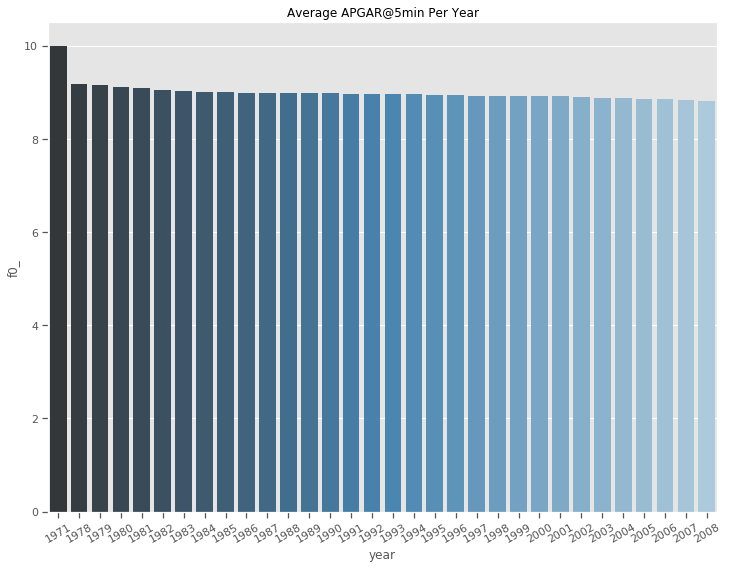

In [9]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="year", y="f0_", data=APGAR_5min_years, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Average APGAR@5min Per Year")
plt.show(g)

**From the data visualization above, starting from 1971 to 2008 it seems that there has been a gradual decrease in the average APGAR@5min score from year to year. **

**2. For the most recent year where relevant data is available, visualize how average APGAR @ 5 min varied: (A) BY STATE
 **

After querying to find data for a revelant year, I found that 2005-2008 did not contain enough relevant points to draw any conclusions from. 2004 seemed to be the best and more recent year with enough relevant data to make conclusions from. The query below is what I utlized on Google BigQuery to determine the average APGAR@5min per state in the year 2004. 

In [10]:
query2 = """SELECT state, AVG(apgar_5min) 
            FROM [bigquery-public-data:samples.natality] 
            WHERE apgar_5min<=10 and apgar_5min>=0 and year = 2004 
            GROUP BY state ORDER BY state LIMIT 2000000000
        """

In [11]:
state_APGAR5min = pd.read_csv("../input/State.csv")
state_APGAR5min

,state,f0_
0,AK,8.869266
1,AL,8.934762
2,AR,8.873825
3,AZ,8.903927
4,CO,8.849741
5,CT,8.901142
6,DC,8.824344
7,DE,8.844910
8,FL,8.834198
9,GA,8.890765


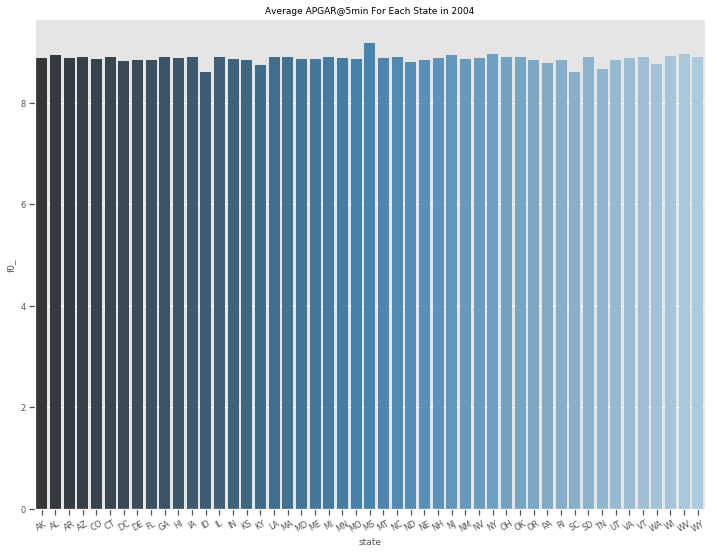

In [12]:
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="state", y="f0_", data=state_APGAR5min, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Average APGAR@5min For Each State in 2004")
plt.show(g)

***From the chart above as, well as exploring the table generated via the query on Google Big Query, the data visualization above does not display any significant deviation of variance between the states. There are certainly some states such as Missouri (higher average) and Idaho, South Carolina, & Tennesse (lower averages) that are slightly different in comparison to the general population, however overall the chart above depicts seemingly stable variance among states concerning the average APGAR@5min  *****

**2. For the most recent year where relevant data is available, visualize how average APGAR @ 5 min varied: (B) Race/Ethnicity 
 **

With regard to Race, after querying through the most recent years, the most current year with relevant data was 1993. 1993 seemed to be the best and more recent year with enough relevant data to make conclusions from. The query below is what I utlized on Google BigQuery to determine the average APGAR@5min based on race in the year 1993. 

In [13]:
query3 = """"SELECT child_race, AVG(apgar_5min) 
        FROM [bigquery-public-data:samples.natality] 
        WHERE apgar_5min<=10 and apgar_5min>=0 and year = 1993 and child_race<=48 
        GROUP BY child_race 
        ORDER BY child_race 
        LIMIT 2000000000
        """

In [14]:
race_APGAR5min = pd.read_csv("../input/Race.csv")
race_APGAR5min

,child_race,f0_
0,1,8.981765
1,2,8.873314
2,3,8.939832
3,4,9.063056
4,5,9.025412
5,6,8.904926
6,7,8.995087
7,9,8.976361
8,18,9.100782
9,28,9.175398


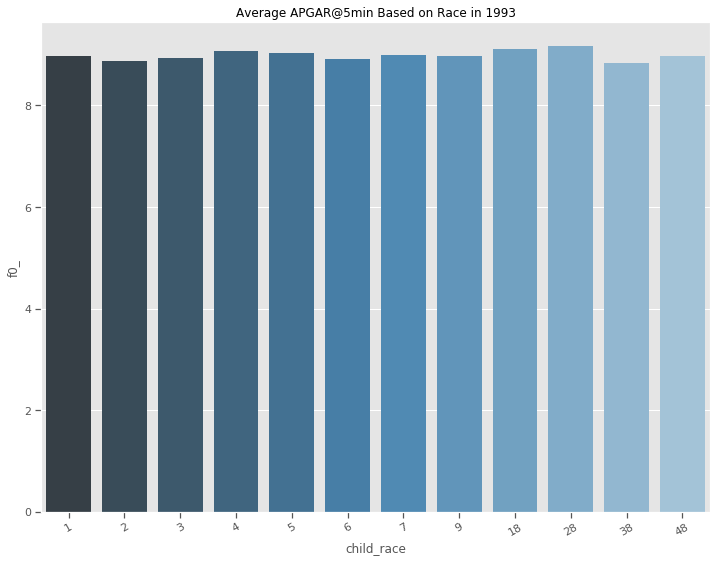

In [15]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="child_race", y="f0_", data=race_APGAR5min, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Average APGAR@5min Based on Race in 1993")
plt.show(g)

***From the chart above as, well as exploring the table generated via the query on Google Big Query, the data visualization above does not display any significant  variance between babies of different race. The variations do not appear to be significant as a result in in realtion to race and APGAR@5min in 1993.   *****

In [16]:
query4 = """SELECT child_race, AVG(apgar_5min), state, year 
            FROM [bigquery-public-data:samples.natality] 
            WHERE apgar_5min<=10 and apgar_5min>=0 and year=2002 and child_race<=48 
            GROUP BY child_race, state, year 
            ORDER BY child_race, state, year 
            LIMIT 2000000000
            """

**3. If you observed any differences in avg APGAR @ 5 min by state or race/ethnicity in Question 2 above, were these differences statistically significant?**


-Based on data visualization as well as taking into account the descriptive statistics for state & APGAR@5min there seems to be statistically significant differences among the following states: Missouri, New York, And Wyoming. The mean for this sample is 8.861209 with a standard deviation of 0.088488. The states mentioned are not within 1 standard deviation of the mean.  However, among the rest of the states there seems to be no statistically significant differences. 

 Based on data visualization as well as taking into account the descriptive statistics for child_race & APGAR@5min there seems to be statistically significant differences among the following races: 2(black),18(Asian-Indian),28(Korean). The mean for this sample for 8.98 with a standard deviation of 0.096. The races mentioned were not within 1 standard deviation of the mean. 

In [17]:
state_APGAR5min.describe()

,f0_
count,49.000000
mean,8.861209
std,0.088488
min,8.595102
25%,8.843825
50%,8.871367
75%,8.896497
max,9.179509


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca266b5ba8>]],
      dtype=object)

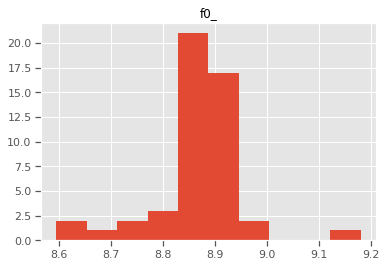

In [18]:
state_APGAR5min.hist()

In [19]:
race_APGAR5min.describe()

,child_race,f0_
count,12.000000,12.000000
mean,14.083333,8.987282
std,15.658041,0.096150
min,1.000000,8.832612
25%,3.750000,8.931105
50%,6.500000,8.980299
75%,20.500000,9.034823
max,48.000000,9.175398


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca265ef9b0>,
      dtype=object)

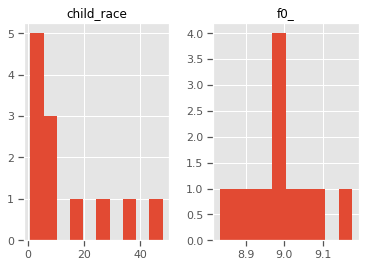

In [20]:
race_APGAR5min.hist()

**4. Split the dataset into a training and test set, then develop a predictive model to predict a child’s APGAR @ 5 min based on the features provided in the dataset.
a. How well did your predictive model perform on the test data?
b. What was your process for testing various algorithms and parameters, and how /
why did you choose your final model?
c. What did you find to be the most important variable(s) in predicting APGAR @ 5
min?**


***-a) I incorporated two models. One employing mutliple linear regression & the other a decision tree regressor. Both performed relatively well, however the Decision Tree Regressor performed better with a better r2_score and lower mean squared error. As a result the Decision Tree Regressor model was the overall better model. The decision tree regressor models had better predictions that were fairly accurate when compared to y_test. (***One of the limitations placed here was that queried and selected a dataset of 100 rows from the BigQuery Sample Table and loaded it in as a csv file in order train and test the model. Attempting to additional rows would have increased the likelihood of discovering more accurate results. However with the contraints of working with Kaggle I tried to choose a sample that was large that I could draw conclusions from.)***


***-b)I had recently completed a project concerning how to determine which features contributed to helping to predict  the current housing market in Boston. With this in mind, I saw my two options cut to one as having to use a regressor instead of classifier which was necessary for predicting APGAR@5min values. I tried to utlize features (columns) from the dataset that would try to be an indicator or have some sort of correlation with regard to APGAR values. In both models that I created, I set the X value to the three variables I thought would contribute the most to helping predict agpar_5min values : X = data[['weight_pounds','gestation_weeks','mother_age']] and  Y= data[['apgar_5min']]. I additionally split the dataset into both a train and testing dataset using sklearn cross validation. One of the parameters I set for the split was to assign the test-size to 20% of the data. After this the X_train, and y_train were input into the model to train the model. And subsequently I then created a prediction variable using X_test as the input to predict values. With regard to the DecisionTreeRegresssor I found that the model worked best with a max_depth = 3. I chose my model below based on the score metrics(r2_score, mean_squared) that I incorporated below to detemine which model performed better. ***
    
    
**-c)After trying to find a correlation of between the variables such as 'weight_pounds','gestation_weeks','mother_age', I found that mother_age's had the best correlation with APGAR@5min in comparison to the other ones I incorpated. Baby Weight had the the next best correlation with APGAR@5min. Additionally, plotting all three correlations it revealed that by themsevles, the variables would not accurately predict APGAR@5min, but after combining them into one X value they produced a model that would. ***
    
***Utlizing the full sample fo the Big Query of Natality would result in better accruacy to predict the APGAR@5min, unfornately because of the Bad Request Error and Size of the dataset the limitations prevented a better result." 

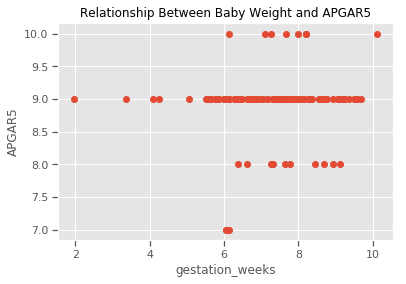

In [32]:
plt.scatter(data["weight_pounds"],data["apgar_5min"])
plt.xlabel("gestation_weeks")
plt.ylabel("APGAR5")
plt.title("Relationship Between Baby Weight and APGAR5")
plt.show()

In [35]:
data["weight_pounds"].corr(data["apgar_5min"])

0.08974767886204145

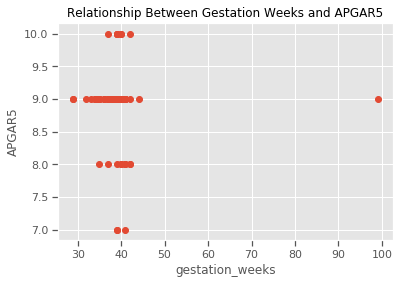

In [44]:
plt.scatter(data["gestation_weeks"],data["apgar_5min"])
plt.xlabel("gestation_weeks")
plt.ylabel("APGAR5")
plt.title("Relationship Between Gestation Weeks and APGAR5")
plt.show()

In [38]:
data["gestation_weeks"].corr(data["apgar_5min"])

-0.02318355647231874

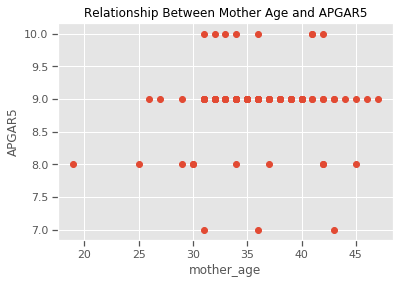

In [45]:
plt.scatter(data["mother_age"],data["apgar_5min"])
plt.xlabel("mother_age")
plt.ylabel("APGAR5")
plt.title("Relationship Between Mother Age and APGAR5")
plt.show()

In [39]:
data["mother_age"].corr(data["apgar_5min"])

0.09250536977375076

In [21]:
import sklearn
data = pd.read_csv("../input/Predict_Model.csv")
data
X = data[['weight_pounds','gestation_weeks','mother_age']]
y = data[['apgar_5min']]

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20, random_state = 0)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
from sklearn import linear_model 
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print (predictions)


[[8.90503284]
 [9.06714481]
 [8.64994382]
 [8.84495858]
 [8.80947322]
 [8.73640186]
 [8.83796066]
 [8.7437288 ]
 [8.89024581]
 [8.78567803]
 [6.33496618]
 [8.93877883]
 [8.90647377]
 [8.99066598]
 [8.85456446]
 [8.93693183]
 [8.82377136]
 [8.6500854 ]
 [8.79604068]
 [8.74299877]]


In [24]:
y_test

,apgar_5min
26,9
86,10
2,10
55,9
75,10
93,9
16,9
73,9
54,9
95,9


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: -3.05


In [26]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))

Mean squared error: 0.65


In [27]:
from sklearn.metrics import explained_variance_score
print('Explained Variance score: %.2f' % explained_variance_score(y_test, predictions))

Explained Variance score: -1.56


In [31]:
from sklearn.metrics import matthews_corrcoef
print('Coeffiecent score: %.2f' % explained_variance_score(y_test, predictions))

Coeffiecent score: -1.56


In [30]:
from sklearn.tree import DecisionTreeRegressor 
regressor2 = DecisionTreeRegressor(max_depth=3)
regressor2.fit(X_train, y_train)
predictions2 = regressor2.predict(X_test)
print (predictions2)

[8.         8.         9.04       9.04       9.04       9.04
 9.04       9.04       8.         9.04       9.04       9.04
 9.04       9.04       9.04       8.69230769 9.04       8.69230769
 9.04       8.        ]


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance score: %.2f' % r2_score(y_test, predictions2))

Variance score: -2.12


In [41]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions2))

Mean squared error: 0.50


In [42]:
from sklearn.metrics import explained_variance_score
print('Explained Variance score: %.2f' % explained_variance_score(y_test, predictions))

Explained Variance score: -1.56


In [43]:
from sklearn.metrics import matthews_corrcoef
print('Coeffiecent score: %.2f' % explained_variance_score(y_test, predictions))

Coeffiecent score: -1.56
